In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime
import sklearn.mixture as mix

import scipy.stats as scs

import datetime as dt

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
%matplotlib inline

import seaborn as sns

/var/folders/5f/1zf902pj3r74d6cxx3w0j0gw0000gn/T/ipykernel_24632/2794383175.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import yfinance as yf

df = yf.Ticker("BTC-USD")

# get stock info
df.info

# get historical market data
df = df.history(period="max")

/Users/oattao/Desktop/ATP/atp/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [3]:
df["Returns"] = df["Close"].pct_change()

In [4]:
df = df[2000 : ]
df["range"] = (df["High"]/df["Low"])-1
df = df.dropna()

In [5]:
#create train and test sets
#this methodology will randomly select 80% of our data

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [6]:
X_train = train[[ "Returns", "range", "Close"]]
X_test = test[[ "Returns", "range", "Close"]]

In [7]:
model = mix.GaussianMixture(n_components=2, 
                            covariance_type="full", 
                            n_init=100, 
                            random_state=7).fit(X_train)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X_test)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covariances_[i]))
    print()

Means and vars of each hidden state
0th hidden state
mean =  [1.63156962e-03 2.97939020e-02 2.88973302e+04]
var =  [2.26581450e-04 1.87883119e-04 2.13063840e+08]

1th hidden state
mean =  [4.27903245e-03 8.02786961e-02 3.33596549e+04]
var =  [3.05545087e-03 1.81117649e-03 2.20072042e+08]



findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'couri

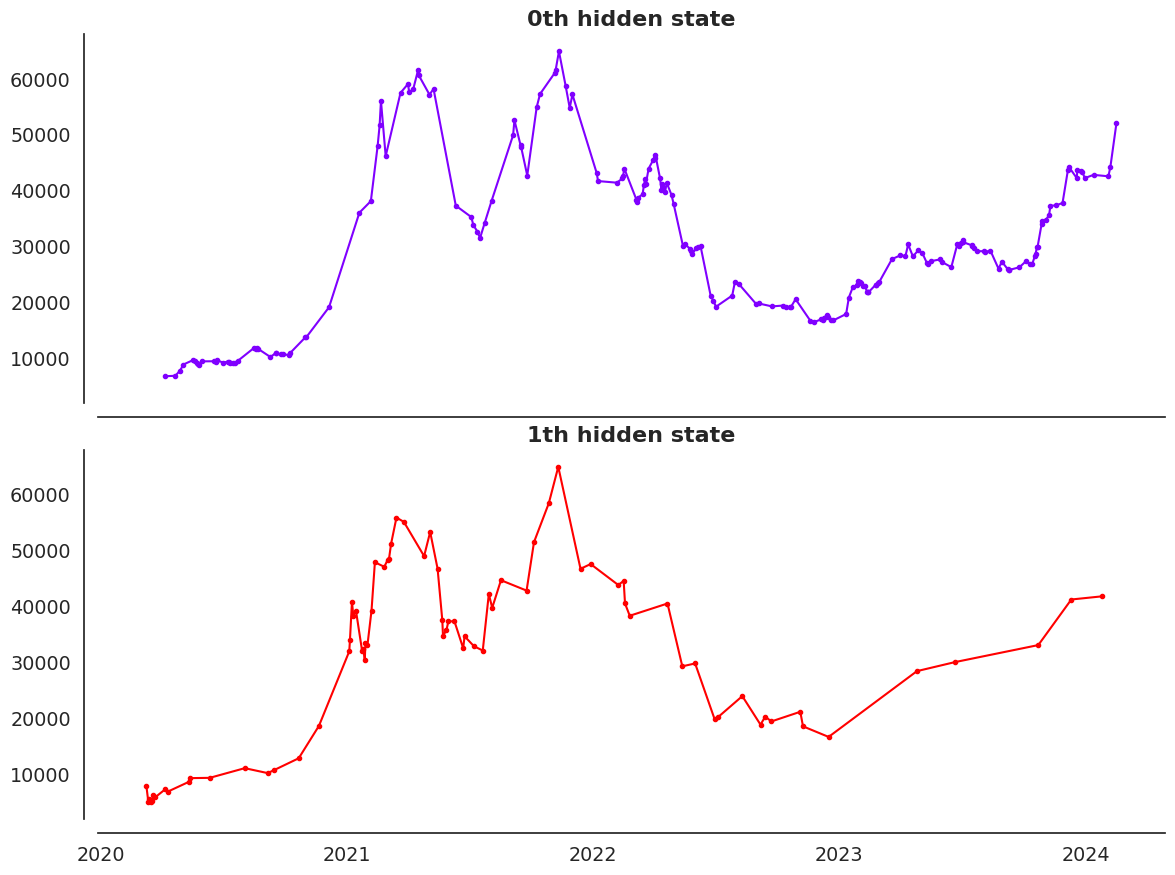

In [8]:
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 4,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(12,9))
colors = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(X_test.index.values[mask],
                 X_test["Close"].values[mask],
                 ".-", c=color)
    ax.set_title("{0}th hidden state".format(i), fontsize=16, fontweight='demi')

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    sns.despine(offset=10)

plt.tight_layout()

findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'couri

Text(0.5, 0.98, 'Historical SPY Regimes')

findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'couri

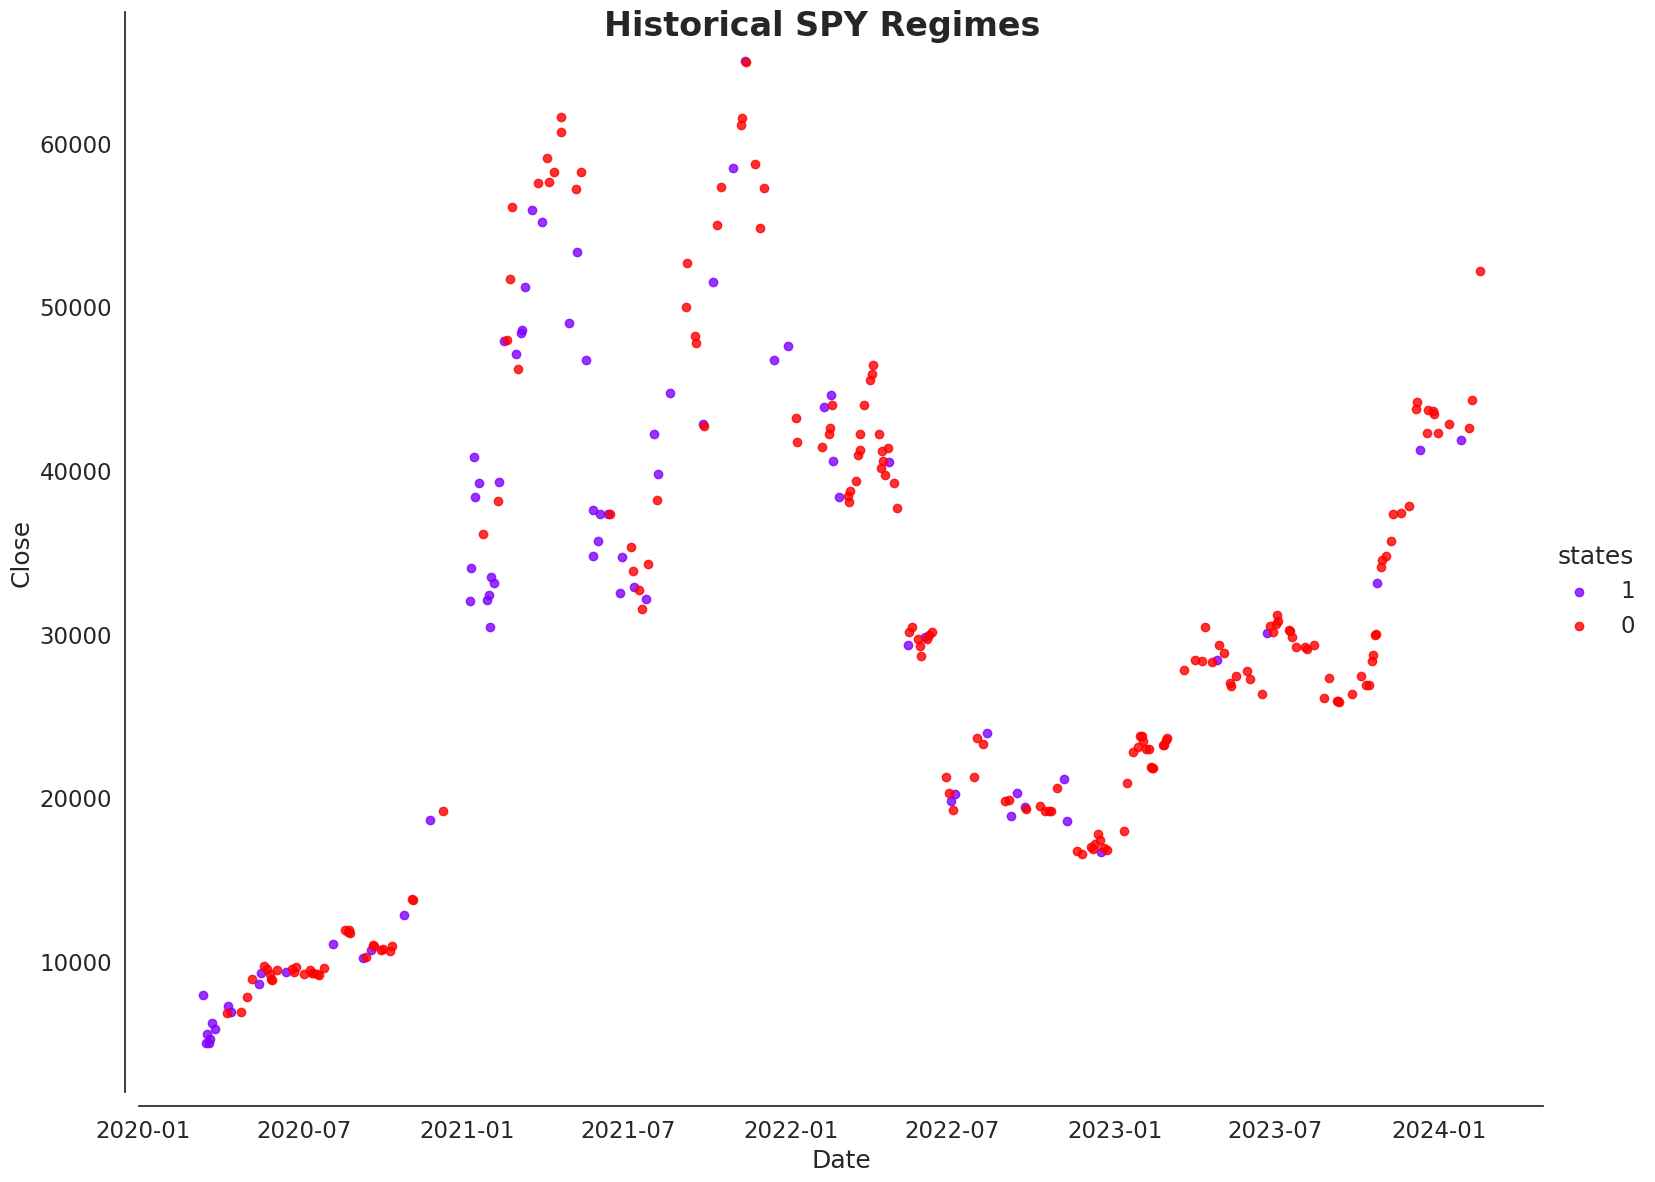

In [9]:
sns.set(font_scale=1.5)
states = (pd.DataFrame(hidden_states, columns=['states'], index=X_test.index)
          .join(X_test, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
states.head()
#suppressing warnings because of some issues with the font package
#in general, would not rec turning off warnings.
import warnings
warnings.filterwarnings("ignore")

sns.set_style("white", style_kwds)
order = [1, 0]
fg = sns.FacetGrid(data=states, hue='states', hue_order=order,
                   palette=colors, aspect=1.31, height=12)
fg.map(plt.scatter, 'Date', "Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical SPY Regimes', fontsize=24, fontweight='demi')

In [10]:
model = mix.GaussianMixture(n_components=3, 
                            covariance_type="full", 
                            n_init=100, 
                            random_state=7).fit(X_train)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X_test)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covariances_[i]))
    print()

Means and vars of each hidden state
0th hidden state
mean =  [4.87329229e-03 1.09662009e-01 3.41158128e+04]
var =  [5.23931893e-03 2.40606287e-03 2.09899861e+08]

1th hidden state
mean =  [2.30435787e-03 4.83994247e-02 3.41666073e+04]
var =  [7.99048531e-04 1.84234559e-04 2.47561581e+08]

2th hidden state
mean =  [1.82824933e-03 2.10251769e-02 2.46472423e+04]
var =  [8.78719538e-05 6.95839985e-05 1.37461934e+08]



findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'couri

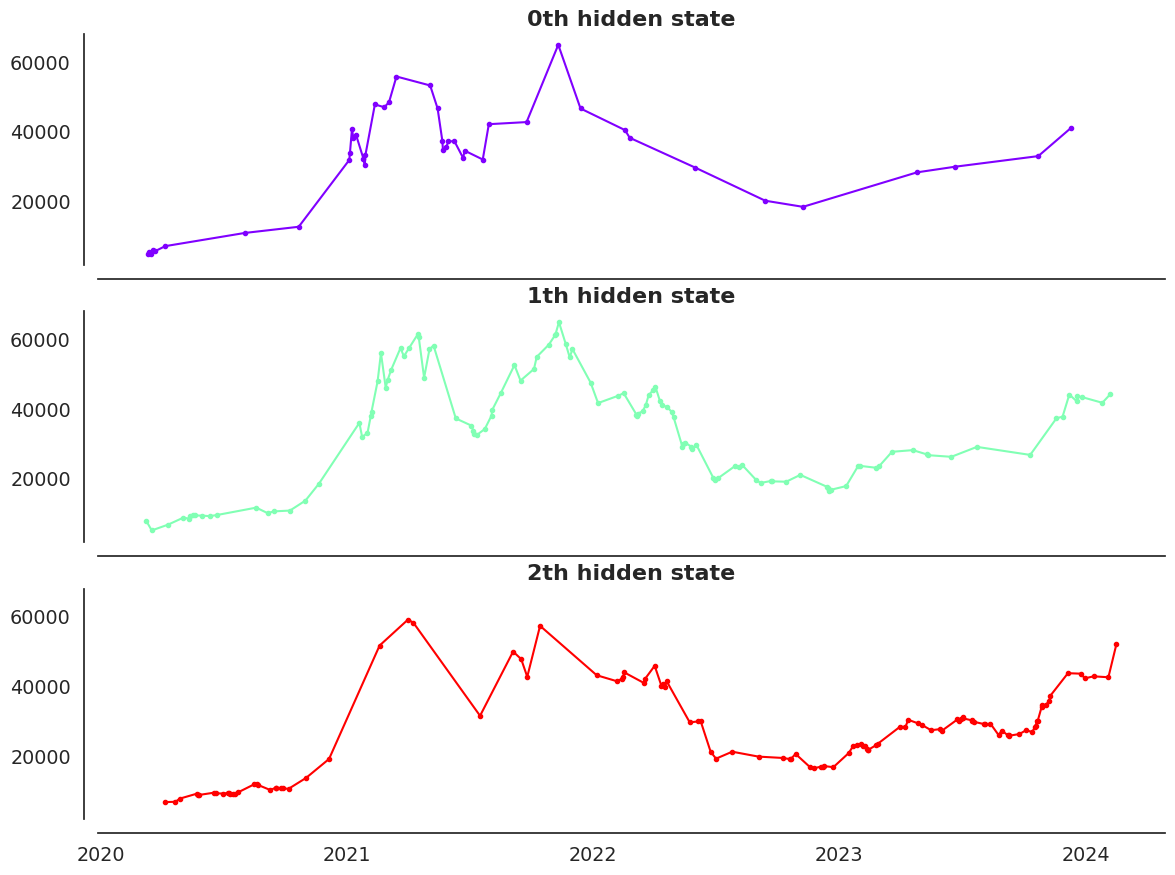

In [11]:
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 4,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(12,9))
colors = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(X_test.index.values[mask],
                 X_test["Close"].values[mask],
                 ".-", c=color)
    ax.set_title("{0}th hidden state".format(i), fontsize=16, fontweight='demi')

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    sns.despine(offset=10)

plt.tight_layout()

findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'couri

Text(0.5, 0.98, 'Historical SPY Regimes')

findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'couri

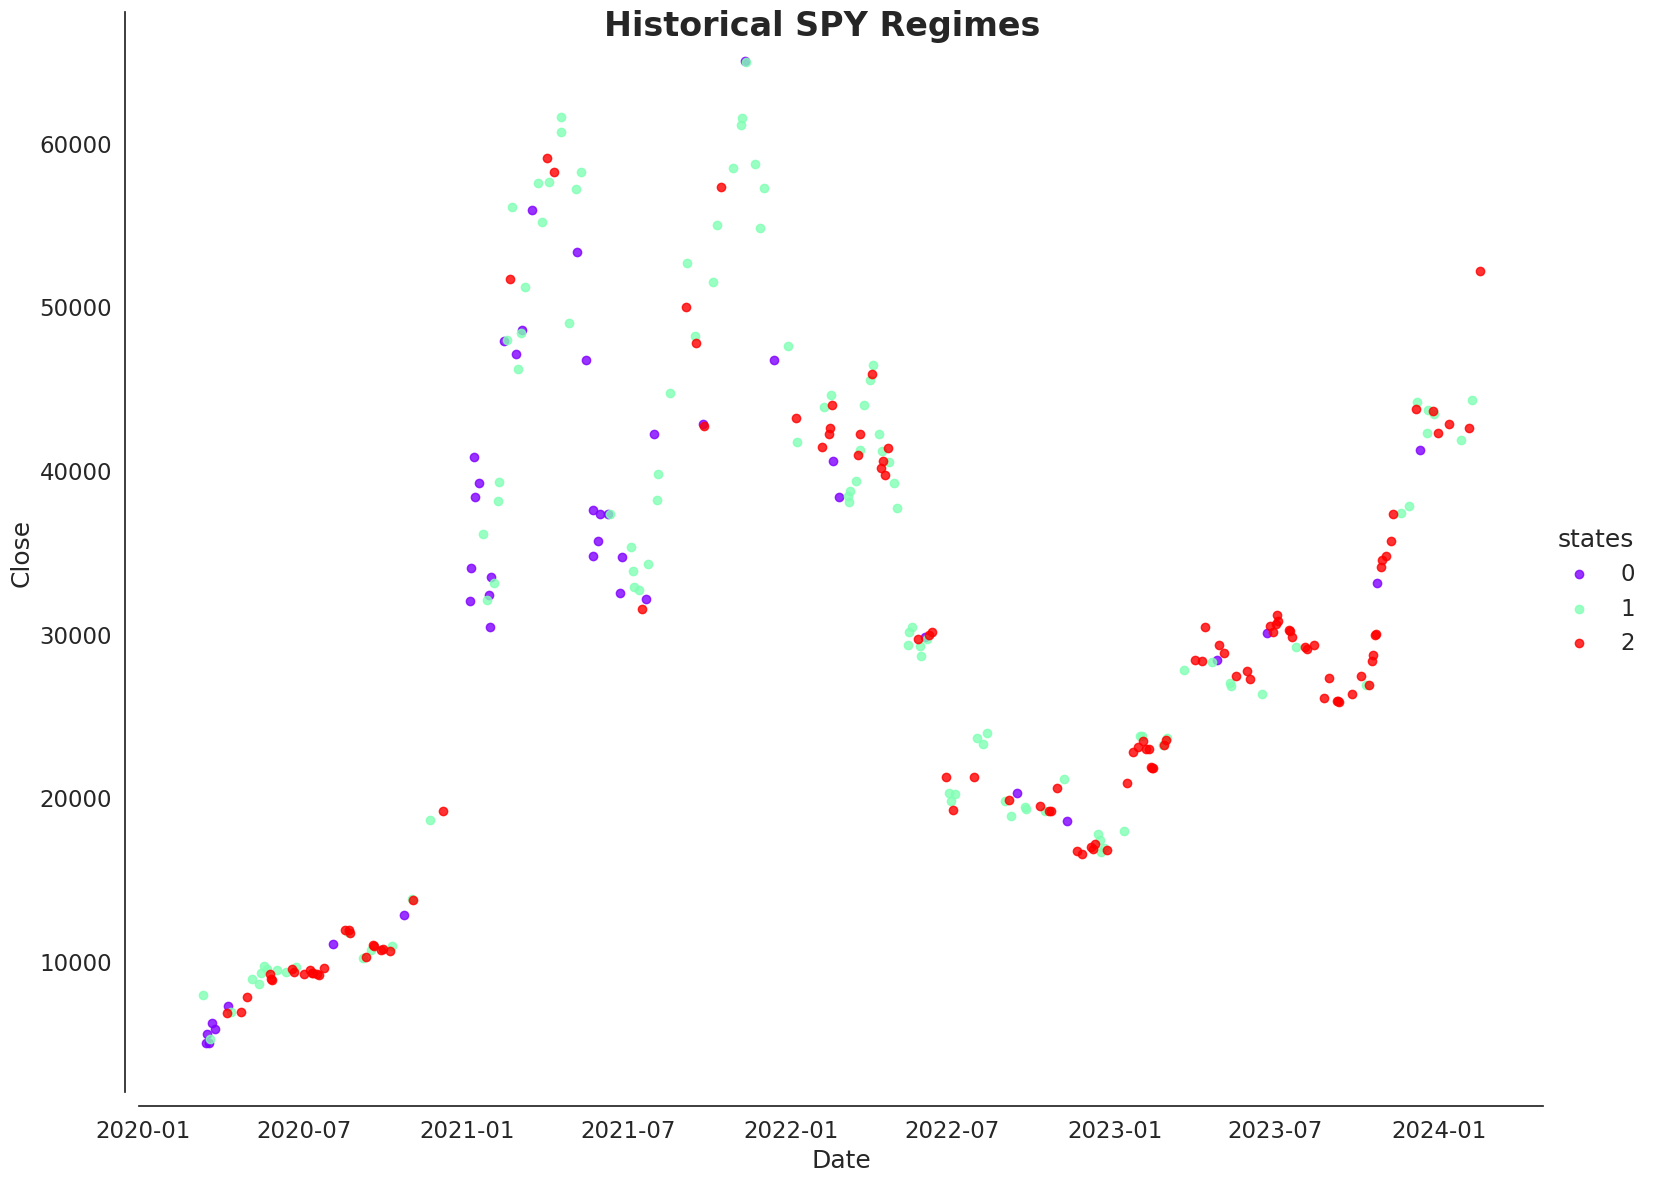

In [12]:
sns.set(font_scale=1.5)
states = (pd.DataFrame(hidden_states, columns=['states'], index=X_test.index)
          .join(X_test, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
states.head()
#suppressing warnings because of some issues with the font package
#in general, would not rec turning off warnings.
import warnings
warnings.filterwarnings("ignore")

sns.set_style("white", style_kwds)
order = [0, 1, 2]
fg = sns.FacetGrid(data=states, hue='states', hue_order=order,
                   palette=colors, aspect=1.31, height=12)
fg.map(plt.scatter, 'Date', "Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical SPY Regimes', fontsize=24, fontweight='demi')

In [13]:
import yfinance as yf

df = yf.Ticker("BTC-USD")

# get stock info
df.info

# get historical market data
df = df.history(period="max")
df["Returns"] = df["Close"].pct_change()
df["range"] = (df["High"]/df["Low"])-1
df = df.dropna()

#create train and test sets
#this methodology will randomly select 80% of our data

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

X_train = train[[ "Returns", "range", "Close"]]
X_test = test[[ "Returns", "range", "Close"]]

In [14]:
model = mix.GaussianMixture(n_components=3, 
                            covariance_type="full", 
                            n_init=100, 
                            random_state=7).fit(X_train)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X_test)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covariances_[i]))
    print()

Means and vars of each hidden state
0th hidden state
mean =  [4.19895706e-03 3.49929378e-02 3.65063277e+03]
var =  [5.44129322e-04 3.63114098e-04 1.39287730e+07]

1th hidden state
mean =  [1.76496897e-04 9.65134330e-02 2.24074542e+04]
var =  [4.50150545e-03 3.06429596e-03 3.20976753e+08]

2th hidden state
mean =  [2.26818375e-03 2.55956821e-02 2.33166772e+04]
var =  [1.68314007e-04 1.66828550e-04 2.85231288e+08]



findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'couri

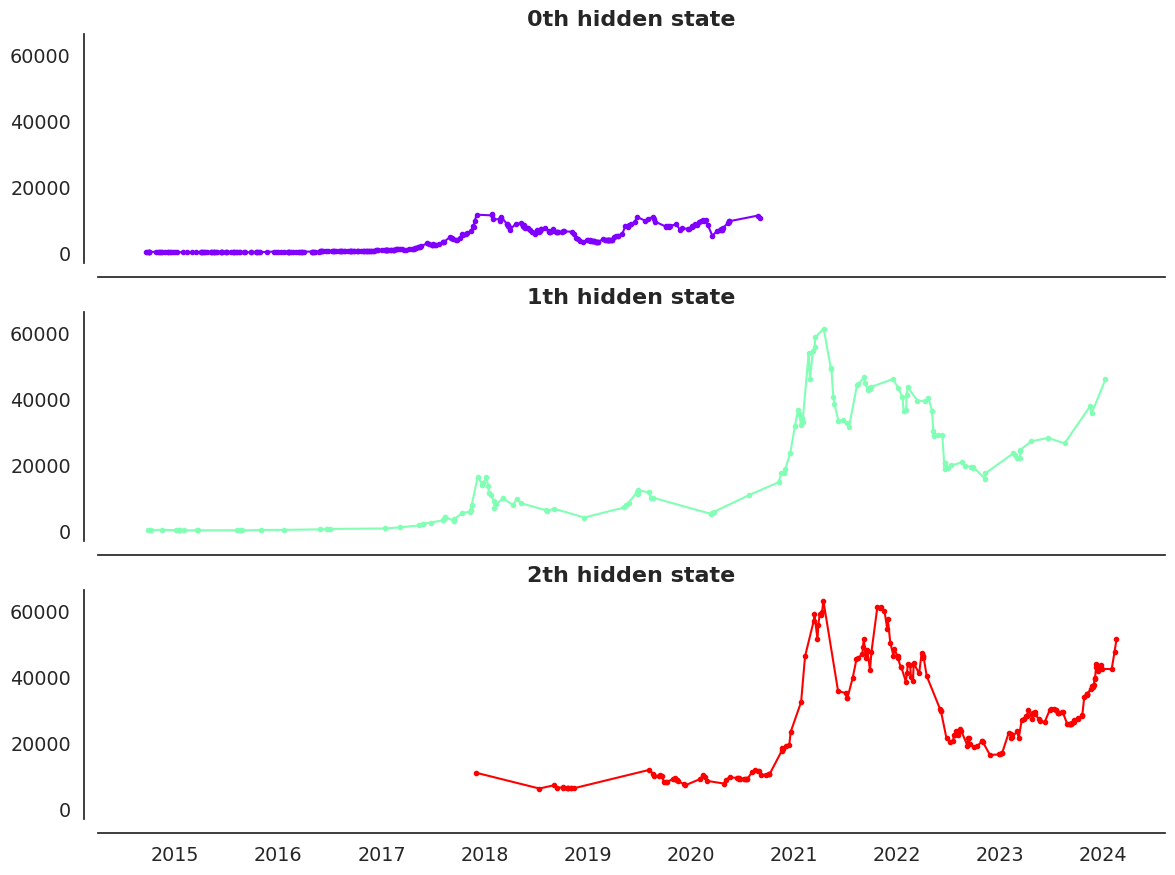

In [15]:
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 4,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(12,9))
colors = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(X_test.index.values[mask],
                 X_test["Close"].values[mask],
                 ".-", c=color)
    ax.set_title("{0}th hidden state".format(i), fontsize=16, fontweight='demi')

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    sns.despine(offset=10)

plt.tight_layout()

findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'couri

Text(0.5, 0.98, 'Historical SPY Regimes')

findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'courier prime code' not found.
findfont: Font family 'couri

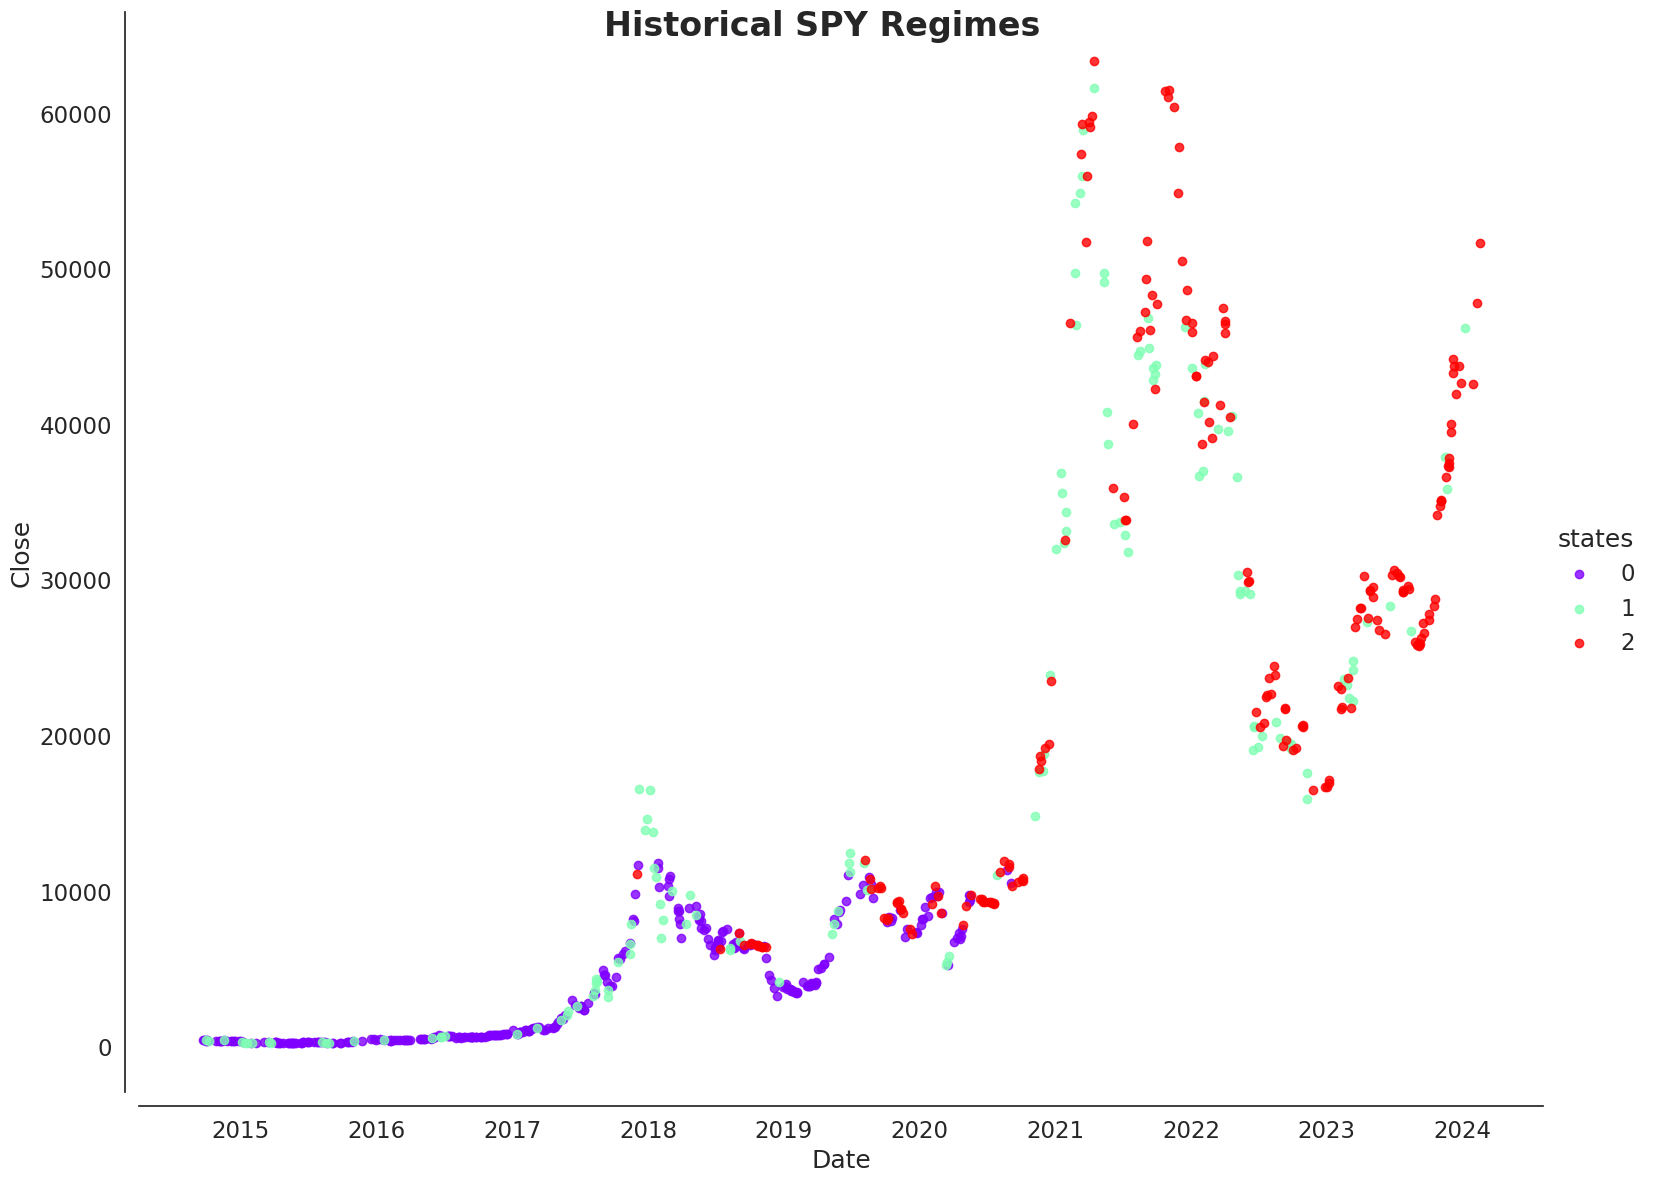

In [16]:
sns.set(font_scale=1.5)
states = (pd.DataFrame(hidden_states, columns=['states'], index=X_test.index)
          .join(X_test, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
states.head()
#suppressing warnings because of some issues with the font package
#in general, would not rec turning off warnings.
import warnings
warnings.filterwarnings("ignore")

sns.set_style("white", style_kwds)
order = [0, 1, 2]
fg = sns.FacetGrid(data=states, hue='states', hue_order=order,
                   palette=colors, aspect=1.31, height=12)
fg.map(plt.scatter, 'Date', "Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical SPY Regimes', fontsize=24, fontweight='demi')